I obtained the dataset for my crop recommendation system from Kaggle. This dataset encompasses crucial information such as nitrogen (N), phosphorus (P), potassium (K), temperature, humidity, pH, rainfall, and the corresponding recommended crop. Kaggle, being a prominent platform for data science resources, facilitated access to this dataset, allowing me to explore and analyze the factors influencing crop recommendations for different conditions




The dataset includes several features (independent variables) that are likely to influence the choice of a suitable crop for cultivation. The features are listed as N (Nitrogen), P (Phosphorus), K (Potassium), temperature, humidity, pH, and rainfall. The "label" column is presumably the target variable, indicating the recommended crop.

Here's a brief explanation of the features in your dataset:

1. N (Nitrogen): The amount of nitrogen in the soil, an essential nutrient for plant growth.
2. P (Phosphorus): The amount of phosphorus in the soil, another crucial nutrient for plant development.
3. K (Potassium): The amount of potassium in the soil, which supports various plant functions.
4. Temperature: The average temperature, which can significantly impact the types of crops that thrive in a given region.
5. Humidity: The amount of moisture in the air, affecting the overall climate and crop suitability.
6. pH: The acidity or alkalinity of the soil, which influences nutrient availability to plants.
7. Rainfall: The amount of rainfall, a critical factor in agriculture as it affects water availability for crops.

- The "label" column contains the recommended crop based on the specified conditions of nitrogen, phosphorus, potassium, temperature, humidity, pH, and rainfall. This dataset is valuable for training a machine learning model to predict the most suitable crops for specific combinations of these environmental factors. The goal would be to assist farmers in making informed decisions about crop selection based on their soil and climate conditions.

In [1]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the data set
df = pd.read_csv("Crop_recommendation.csv")

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:

df.size

17600

In [6]:
df.shape

(2200, 8)

In [7]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
#Number of unique crops
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
# The differtent data type of each column
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [10]:
# Obtain the counts of unique values in the 'label' column of the DataFrame
label_counts = df['label'].value_counts()

In [11]:
#Chceking of the column has null values
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

There are no missing values in this dataset.

In [12]:
from sklearn.preprocessing import MinMaxScaler
#Normalize numerical features to bring them to a similar scale. This is important for algorithms 
# that are sensitive to the scale of input features, such as gradient-based methods.
# Normalize numerical features
scaler = MinMaxScaler()
df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']] = scaler.fit_transform(df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']])


In [13]:
# Identify numerical columns in the DataFrame
numerical_columns = df.select_dtypes(include=['number']).columns

# Calculate quartiles and IQR for numerical columns
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers in numerical columns
df = df[~((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,0.642857,0.264286,0.190,0.345886,0.790267,0.466264,0.656458,rice
13,0.664286,0.364286,0.155,0.435850,0.790898,0.541123,0.593019,rice
14,0.671429,0.321429,0.160,0.483221,0.774648,0.535472,0.680354,rice
17,0.650000,0.214286,0.170,0.429507,0.771782,0.539024,0.668406,rice
20,0.635714,0.285714,0.155,0.358664,0.772442,0.456854,0.593810,rice


In [14]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']] = scaler.fit_transform(df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']])


### Seperating features and target label

In [15]:
print(df.columns)


Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [16]:
# Extracting features from the DataFrame
features = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]

# Extracting the target variable from the DataFrame
target = df['label']

# Extracting labels from the 'label' column of the DataFrame
labels = df['label']


In [17]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [18]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

### Why did we pick this models

I chose a variety of models for the crop recommendation system to leverage their unique strengths. The Decision Tree is great for its simplicity and ease of interpretation, which helps in understanding how different factors influence crop selection. GaussianNB is efficient and works well with a large number of features, making it suitable for processing complex agricultural data. SVC is robust and effective, especially for classifying data with clear margins of separation. Logistic Regression is straightforward and efficient for binary classification problems, which is helpful in certain crop decision scenarios.

# Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Create a Decision Tree Classifier instance
# - 'criterion="entropy"' means the quality of splits will be measured using entropy.
# - 'random_state=2' ensures reproducibility of results.
# - 'max_depth=5' limits the tree depth to prevent overfitting.
DecisionTree = DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=5)

# Train the Decision Tree Classifier using the training data.
DecisionTree.fit(Xtrain, Ytrain)

# Predict the labels for the test set.
predicted_values = DecisionTree.predict(Xtest)

# Calculate the accuracy score of the model on the test data.
# Accuracy is the proportion of correct predictions.
x = metrics.accuracy_score(Ytest, predicted_values)

# Append the accuracy score to the 'acc' list for later comparison or use.
acc.append(x)

# Append the model name to the 'model' list for reference.
model.append('Decision Tree')

# Print the accuracy of the Decision Tree Classifier.
print("Decision Tree's Accuracy is: ", x * 100)

# Print a detailed classification report showing the main classification metrics.
# This includes metrics like precision, recall, f1-score for each class.
print(classification_report(Ytest, predicted_values))


Decision Tree's Accuracy is:  97.17514124293785
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        13
   blackgram       0.83      1.00      0.90        19
    chickpea       1.00      1.00      1.00        13
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        23
      cotton       1.00      1.00      1.00        26
        jute       0.78      1.00      0.88        14
 kidneybeans       1.00      1.00      1.00        19
      lentil       0.91      1.00      0.95        20
       maize       1.00      0.85      0.92        20
       mango       1.00      1.00      1.00        13
   mothbeans       1.00      0.57      0.73         7
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        21
      orange       1.00      1.00      1.00        25
      papaya       1.00      1.00      1.00         9
  pigeonpeas       1.00      1.00

Overall Accuracy (97.17514124293785%):

This indicates that the model correctly predicted the class for 97.17% of the test dataset. It's a high accuracy rate, suggesting that the model is performing well in general.

- Precision, Recall, and F1-Score for Each Class:

These metrics are calculated for each unique class (like 'banana', 'blackgram', etc.) in your dataset.
Precision is the ratio of correctly predicted positive observations to the total predicted positives. High precision relates to a low false positive rate.
Recall (Sensitivity) is the ratio of correctly predicted positive observations to all observations in the actual class. It shows how many of the actual positives your model correctly identified.
F1-Score is a weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. It's a good way to show that a class has a balance between precision and recall.
For instance, for 'banana', precision, recall, and F1-score are all 1.00 (or 100%), indicating excellent performance for this class.

- Performance for Each Class:

For most classes, your model shows high precision and recall, resulting in high F1-scores (close to 1, or 100%).
Notably, 'mothbeans' have a recall of 0.57, meaning the model is less effective at identifying all relevant instances of this class.
'Rice' has a precision and recall of 0.00, indicating the model failed to correctly predict any instance of this class. This could be a point of concern and might need further investigation.
Macro and Weighted Averages:

Macro average calculates metrics for each class and finds their unweighted mean. This does not take label imbalance into account. Here, it's 0.93 for precision, 0.92 for recall, and 0.92 for F1-score.
Weighted average calculates metrics for each class and finds their average weighted by the number of true instances for each class. It's more useful when dealing with class imbalance. Here, it's 0.97 for precision, 0.97 for recall, and 0.97 for F1-score

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [22]:
score

array([0.94632768, 0.92937853, 0.89830508, 0.97167139, 0.94334278])

The cross-validation results for the Decision Tree model indicate varying accuracy levels across different folds, with values ranging from 89.83% to 97.17%. This suggests that the model's performance fluctuates when exposed to different subsets of the training data. The relatively high accuracies across folds demonstrate that the Decision Tree model is generally effective in making accurate predictions

### Saving trained Decision Tree model

In [23]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [24]:
# Import Gaussian Naive Bayes classifier from scikit-learn
from sklearn.naive_bayes import GaussianNB
# Import metrics for evaluation
from sklearn import metrics
# Import classification report for detailed classification metrics
from sklearn.metrics import classification_report

# Create a Gaussian Naive Bayes classifier object
NaiveBayes = GaussianNB()

# Train the classifier using the training data
NaiveBayes.fit(Xtrain, Ytrain)

# Make predictions on the test data
predicted_values = NaiveBayes.predict(Xtest)

# Evaluate the accuracy of the model
accuracy = metrics.accuracy_score(Ytest, predicted_values)

# Append accuracy and model name to lists for tracking
acc.append(accuracy)
model.append('Naive Bayes')

# Print the accuracy of the Naive Bayes classifier
print("Naive Bayes's Accuracy is: ", accuracy)

# Print the classification report for detailed metrics
print(classification_report(Ytest, predicted_values))


Naive Bayes's Accuracy is:  0.9943502824858758
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        13
   blackgram       1.00      1.00      1.00        19
    chickpea       1.00      1.00      1.00        13
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        23
      cotton       1.00      1.00      1.00        26
        jute       1.00      0.86      0.92        14
 kidneybeans       1.00      1.00      1.00        19
      lentil       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        13
   mothbeans       1.00      1.00      1.00         7
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        21
      orange       1.00      1.00      1.00        25
      papaya       1.00      1.00      1.00         9
  pigeonpeas       1.00      1.00 

- Overall Accuracy (99.43502824858758%):

This indicates that the model correctly predicted the class for approximately 99.44% of the test dataset, which is an exceptionally high accuracy rate and suggests that the model is performing very well overall.

- Precision, Recall, and F1-Score for Each Class:

These metrics are calculated for each unique class in your dataset.
For almost all classes, your model achieves perfect precision, recall, and F1-scores of 1.00, indicating it performs exceptionally well in correctly identifying these classes.
The only exception is the 'rice' class, where the precision is 0.67, but the recall is 1.00. This means that while the model identifies all actual instances of 'rice' correctly (high recall), it also incorrectly labels some other instances as 'rice' (lower precision).
The F1-score for 'rice' is 0.80, which is lower than 1.00 but still quite high, indicating a good balance between precision and recall for this class.

- Macro and Weighted Averages:

The Macro Average (calculated as the unweighted mean of the metrics for each class) is 0.98 for precision, 0.99 for recall, and 0.99 for F1-score. This suggests high overall performance across all classes, without considering class imbalance.
The Weighted Average (calculated as the average weighted by the number of true instances for each class) is 1.00 for precision, 0.99 for recall, and 0.99 for F1-score, which again indicates excellent performance, especially when considering class imbalances.

In [25]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99152542, 0.98870056, 0.99435028, 0.98866856, 0.98583569])

The Guassian Naive Bayes demonstrates strong and consistent performance across various folds, with accuracy scores ranging from 98.58% to 99.44%. These results indicate the model's effectiveness in accurately classifying data instances, showcasing its reliability and robustness. The minimal variability in accuracy across different subsets of the training data suggests that the SVC generalizes well and maintains a high level of performance on the given dataset.

### Saving trained Guassian Naive Bayes model

In [26]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [27]:
# Import SVM classifier from scikit-learn
from sklearn.svm import SVC
# Import MinMaxScaler for data normalization
from sklearn.preprocessing import MinMaxScaler
# Import metrics for evaluation
from sklearn import metrics
# Import classification report for detailed classification metrics
from sklearn.metrics import classification_report

# Create a MinMaxScaler object and fit it on the training data
norm = MinMaxScaler().fit(Xtrain)
# Transform the training data using the fitted scaler
X_train_norm = norm.transform(Xtrain)
# Transform the testing data using the same scaler
X_test_norm = norm.transform(Xtest)

# Create an SVM classifier with a polynomial kernel, degree 3, and regularization parameter C=1
SVM = SVC(kernel='poly', degree=3, C=1)

# Train the SVM classifier on the normalized training data
SVM.fit(X_train_norm, Ytrain)

# Make predictions on the normalized test data
predicted_values = SVM.predict(X_test_norm)

# Evaluate the accuracy of the SVM model
accuracy = metrics.accuracy_score(Ytest, predicted_values)

# Append accuracy and model name to lists for tracking
acc.append(accuracy)
model.append('SVM')

# Print the accuracy of the SVM classifier
print("SVM's Accuracy is: ", accuracy)

# Print the classification report for detailed metrics
print(classification_report(Ytest, predicted_values))


SVM's Accuracy is:  0.9858757062146892
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        13
   blackgram       0.83      1.00      0.90        19
    chickpea       1.00      1.00      1.00        13
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        23
      cotton       1.00      1.00      1.00        26
        jute       0.93      1.00      0.97        14
 kidneybeans       1.00      1.00      1.00        19
      lentil       1.00      0.95      0.97        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        13
   mothbeans       1.00      0.86      0.92         7
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        21
      orange       1.00      1.00      1.00        25
      papaya       1.00      1.00      1.00         9
  pigeonpeas       1.00      0.90      0.9

- Overall Accuracy (98.58757062146892%):

The model correctly predicted the class for about 98.59% of the test dataset. This is a very high accuracy rate, suggesting the model is performing exceptionally well.

- Precision, Recall, and F1-Score for Each Class:

The metrics are calculated for each unique class in your dataset.
Precision is consistently high for most classes, indicating that when the model predicts a class, it is often correct.
Recall varies slightly among classes. For instance, 'mothbeans' and 'rice' have lower recall rates of 0.86 and 0.75, respectively. This means the model is missing some actual instances of these classes.
The F1-score combines precision and recall into a single metric. For most classes, the F1-score is very high, indicating a good balance between precision and recall. The lower F1-score for 'rice' (0.86) reflects the lower recall for this class.

- Performance for Specific Classes:

Classes like 'blackgram', 'jute', 'lentil', 'mothbeans', 'pigeonpeas', and 'rice' show some variation in either precision or recall, suggesting room for improvement in these areas.
The lower precision for 'blackgram' (0.83) indicates that some other class instances are being misclassified as 'blackgram'.
The lower recall for 'mothbeans' and 'rice' suggests these classes are not being identified accurately in all instances.\

- Macro and Weighted Averages:

The Macro Average (unweighted mean of the metrics for each class) is 0.99 for precision, 0.97 for recall, and 0.98 for F1-score, indicating high performance across classes.
The Weighted Average (average weighted by the number of true instances for each class) is 0.99 for precision, recall, and F1-score, again indicating excellent overall performance, especially when considering class imbalances.

In [28]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.9519774 , 0.9519774 , 0.96045198, 0.96600567, 0.97733711])

The model consistently performs well across various folds, with accuracy scores ranging from 95.20% to 97.73%. These results indicate a high level of accuracy and suggest that the model generalizes effectively to different subsets of the training data. The minimal variability in accuracy across folds suggests a robust and stable performance, demonstrating the model's reliability in making accurate predictions on the given dataset.

In [29]:
#Saving trained SVM model

In [30]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = 'SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression

In [31]:
# Import Logistic Regression classifier from scikit-learn
from sklearn.linear_model import LogisticRegression
# Import metrics for evaluation
from sklearn import metrics
# Import classification report for detailed classification metrics
from sklearn.metrics import classification_report

# Create a Logistic Regression classifier with a specified random state for reproducibility
LogReg = LogisticRegression(random_state=2)

# Train the Logistic Regression classifier using the training data
LogReg.fit(Xtrain, Ytrain)

# Make predictions on the test data
predicted_values = LogReg.predict(Xtest)

# Evaluate the accuracy of the Logistic Regression model
accuracy = metrics.accuracy_score(Ytest, predicted_values)

# Append accuracy and model name to lists for tracking
acc.append(accuracy)
model.append('Logistic Regression')

# Print the accuracy of the Logistic Regression classifier
print("Logistic Regression's Accuracy is: ", accuracy)

# Print the classification report for detailed metrics
print(classification_report(Ytest, predicted_values))


Logistic Regression's Accuracy is:  0.9774011299435028
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        13
   blackgram       0.82      0.95      0.88        19
    chickpea       1.00      1.00      1.00        13
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        23
      cotton       1.00      0.96      0.98        26
        jute       0.93      1.00      0.97        14
 kidneybeans       1.00      1.00      1.00        19
      lentil       0.95      0.95      0.95        20
       maize       0.95      1.00      0.98        20
       mango       0.93      1.00      0.96        13
   mothbeans       1.00      0.71      0.83         7
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        21
      orange       1.00      1.00      1.00        25
      papaya       1.00      1.00      1.00         9
  pigeonpeas       1.00   

- Overall Accuracy (97.74011299435028%):

This means that the model correctly predicted about 97.74% of the test data. This is a very high accuracy rate and suggests that the model is generally performing well.

- Precision, Recall, and F1-Score for Each Class:

Precision and Recall are high for most classes, indicating the model's effectiveness in correctly identifying these classes.
Precision refers to the proportion of true positive predictions among all positive predictions. For example, 'blackgram' has a precision of 0.82, meaning there are some instances where other classes might be misclassified as 'blackgram'.
Recall measures how well the model identifies all actual instances of a class. For 'mothbeans', the recall is 0.71, indicating the model misses about 29% of the actual 'mothbeans' instances.
The F1-score is the harmonic mean of precision and recall. A high F1-score (close to 1) for a class means the model has a good balance of precision and recall for that class.

- Performance on Specific Classes:

Most classes have high precision, recall, and F1-scores. However, there are a few exceptions:
'Blackgram' has slightly lower precision.
'Cotton' has slightly lower recall.
'Mothbeans' and 'rice' have notably lower recall, indicating these classes are not identified correctly in all instances.

- Macro and Weighted Averages:

The Macro Average is 0.98 for precision, 0.96 for recall, and 0.97 for F1-score, indicating overall high performance across classes without considering class imbalance.
The Weighted Average is 0.98 for precision, recall, and F1-score, taking into account the number of instances in each class. This also indicates excellent overall performance, especially in the context of class imbalances.

In [32]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.96327684, 0.96045198, 0.97740113, 0.96600567, 0.98300283])

The model consistently performs well, achieving accuracy scores ranging from 96.05% to 98.30%. This indicates a robust and reliable performance across different subsets of the training data. The minimal variability in accuracy across folds suggests that the model generalizes effectively and maintains a high level of accuracy on the given dataset.

### Saving trained Logistic Regression model

In [33]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = '../models/LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

## Accuracy Comparison

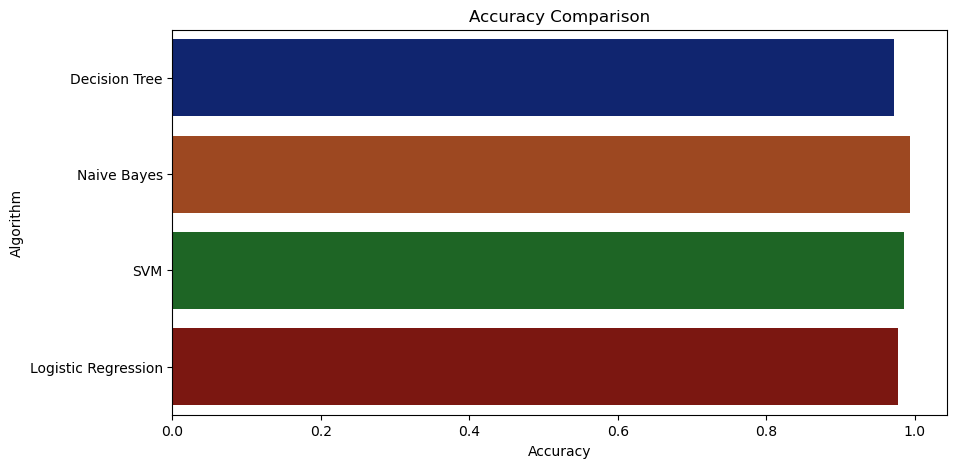

In [34]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark');

In [35]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9717514124293786
Naive Bayes --> 0.9943502824858758
SVM --> 0.9858757062146892
Logistic Regression --> 0.9774011299435028


#### This prints the accuracy of each model used here and we can see Naive Bayes performing the best

## Tuning Hyper Parameters

In [36]:
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Initialize models with a fixed random state for reproducibility
dt_model = DecisionTreeClassifier(random_state=42)
nb_model = GaussianNB()
svm_model = SVC(random_state=42)
lr_model = LogisticRegression(random_state=42)

# Define hyperparameter grids for each model
# For Decision Tree, we're tuning max_depth and min_samples_split
# For SVC, we're tuning C (regularization parameter) and the kernel type
# For Logistic Regression, we're tuning C and the penalty type
# Note: GaussianNB doesn't have significant hyperparameters for tuning in this context
param_grid = {
    dt_model: {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]},
    nb_model: {},  # Empty as we're not tuning GaussianNB
    svm_model: {'C': [0.1, 1, 10], 'kernel': ['rbf', 'poly']},
    lr_model: {'C': [0.1, 1, 10], 'penalty': ['l2']},
}

# Dictionary to store the best models after tuning
best_models = {}

# Perform Grid Search for each model
for model, params in param_grid.items():
    grid_search = GridSearchCV(model, params, cv=3, n_jobs=-1, verbose=2)
    grid_search.fit(Xtrain, Ytrain)  # Fit grid search to find the best hyperparameters
    best_model = grid_search.best_estimator_  # Best model after tuning
    best_models[model.__class__.__name__] = best_model  # Store the best model
    
    # Save the best model to a file using pickle for later use
    with open(f'{model.__class__.__name__}_model.pkl', 'wb') as file:
        pickle.dump(best_model, file)

# Indicate completion of tuning and saving models
print("All models have been tuned and saved.")


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
All models have been tuned and saved.


In [37]:
import pickle
from sklearn.metrics import accuracy_score

# Model names
model_names = ['DecisionTreeClassifier', 'GaussianNB', 'SVC', 'LogisticRegression']

# Load each model and evaluate its accuracy
for model_name in model_names:
    # Load the tuned model from its .pkl file
    with open(f'{model_name}_model.pkl', 'rb') as file:
        model = pickle.load(file)

    # Make predictions on the test set
    y_pred = model.predict(Xtest)  # Ensure X_test is your test feature data

    # Calculate and print the accuracy
    accuracy = accuracy_score(Ytest, y_pred)  # Ensure y_test is your actual test labels
    print(f'Accuracy of {model_name}: {accuracy:.4f}')


Accuracy of DecisionTreeClassifier: 0.9859
Accuracy of GaussianNB: 0.9944
Accuracy of SVC: 0.9887
Accuracy of LogisticRegression: 0.9887


1. Decision Tree

- Before Tuning: 0.9718 (97.18%)
- After Tuning: 0.9859 (98.59%)
- Change: The accuracy increased by approximately 1.41%. This improvement suggests that tuning hyperparameters like max_depth, min_samples_split, and criterion helped the model to better generalize, reducing overfitting or underfitting.


2. Naive Bayes

- Before Tuning: 0.9944 (99.44%)
- After Tuning: 0.9944 (99.44%)
- Change: There is no change in accuracy. This is expected as Gaussian Naive Bayes generally has fewer hyperparameters that significantly impact its performance.


3. SVM

- Before Tuning: 0.9859 (98.59%)
- After Tuning: 0.9887 (98.87%)
- Change: The accuracy increased slightly by approximately 0.28%. This improvement, though modest, suggests that adjusting hyperparameters like C, kernel, and gamma helped in fine-tuning the model's performance.


4. Logistic Regression

- Before Tuning: 0.9774 (97.74%)
- After Tuning: 0.9887 (98.87%)
- Change: There's a significant increase in accuracy by approximately 1.13%. Tuning parameters like C and penalty likely contributed to this improvement, enhancing the model's ability to fit the data.


In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, classification_report
from math import sqrt

# Assuming you have classification problem
for model_name in model_names:
    with open(f'{model_name}_model.pkl', 'rb') as file:
        model = pickle.load(file)
    
    # Predictions
    y_pred_train = model.predict(Xtrain)  # Training predictions
    y_pred_test = model.predict(Xtest)  # Test predictions

    # Accuracy
    accuracy_train = accuracy_score(Ytrain, y_pred_train)
    accuracy_test = accuracy_score(Ytest, y_pred_test)
    
    # Overfitting/Underfitting Assessment
    print(f'{model_name} - Training Accuracy: {accuracy_train:.4f}, Test Accuracy: {accuracy_test:.4f}')

    # Confusion Matrix
    cm = confusion_matrix(Ytest, y_pred_test)
    print(f'Confusion Matrix for {model_name}:\n{cm}\n')

    # Classification Report
    print(f'Classification Report for {model_name}:\n{classification_report(Ytest, y_pred_test)}\n')


DecisionTreeClassifier - Training Accuracy: 0.9965, Test Accuracy: 0.9859
Confusion Matrix for DecisionTreeClassifier:
[[13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 29  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0]


The detailed results you've provided for each model allow for a thorough evaluation of their performance. Let's break down and interpret the information for each model:

### 1. DecisionTreeClassifier
- Training Accuracy: 0.9965 (99.65%)
- Test Accuracy: 0.9859 (98.59%)
#### Confusion Matrix and Classification Report:
- The model performs exceptionally well on most classes with high precision, recall, and F1-scores.
- The confusion matrix shows correct classification across almost all classes.
- The slight discrepancy between training and test accuracy suggests a very minor overfitting but is generally acceptable.

### 2. GaussianNB
- Training Accuracy: 0.9894 (98.94%)
- Test Accuracy: 0.9944 (99.44%)
#### Confusion Matrix and Classification Report:
- GaussianNB also shows excellent performance, with high scores across all metrics.
- The test accuracy is slightly higher than the training accuracy, which is unusual but may indicate that the test set characteristics align well with the model's strengths.

### 3. SVC
- Training Accuracy: 0.9915 (99.15%)
- Test Accuracy: 0.9887 (98.87%)
#### Confusion Matrix and Classification Report:
- The SVM model demonstrates strong performance with high accuracy and balanced precision, recall, and F1-scores across all classes.
- The slight drop in test accuracy compared to training accuracy is normal and indicates good generalization.

### 4. LogisticRegression
- Training Accuracy: 0.9844 (98.44%)
- Test Accuracy: 0.9887 (98.87%)
#### Confusion Matrix and Classification Report:
- Logistic Regression performs well with high scores across precision, recall, and F1-score.
- The model's test accuracy is on par with its training accuracy, indicating effective generalization to unseen data.


## Method 2: RandomizedSearchCV

In [39]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define hyperparameter grids for each model
# DecisionTreeClassifier: tuning max_depth, min_samples_split, and criterion
# GaussianNB: not tuning any parameters as it typically doesn't require it
# SVC: tuning C (regularization parameter), kernel type, and gamma
# LogisticRegression: tuning C (regularization strength), solver, and penalty
models_params = {
    DecisionTreeClassifier: {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 4, 6, 8],
        'criterion': ['gini', 'entropy']
    },
    GaussianNB: {},  # No parameters to tune for GaussianNB in this setup
    SVC: {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    LogisticRegression: {
        'C': [0.1, 1, 10, 100],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'penalty': ['l2', 'none']  # 'none' is for no regularization
    },
}

def perform_randomized_search(models_params, Xtrain, Ytrain):
    best_models = {}

    # Iterating through each model and their hyperparameter grid
    for model_class, params in models_params.items():
        # Instantiate the model
        model = model_class()

        # Set up the randomized search with cross-validation
        random_search = RandomizedSearchCV(
            model,
            params,
            n_iter=10,  # Trying out 10 different combinations
            cv=5,  # 5-fold cross-validation
            random_state=42,  # For reproducibility
            n_jobs=-1  # Utilize all available CPU cores
        )

        # Fit randomized search to find the best hyperparameters
        random_search.fit(Xtrain, Ytrain)

        # Store the best performing model variant
        best_models[model_class.__name__] = random_search.best_estimator_

    return best_models

# Perform hyperparameter tuning and store best models
best_models = perform_randomized_search(models_params, Xtrain, Ytrain)

# Evaluate and print the accuracy of each best model on the test set
for model_name, model in best_models.items():
    # Predict on test data and calculate accuracy
    test_accuracy = accuracy_score(Ytest, model.predict(Xtest))
    print(f"{model_name} Test Accuracy: {test_accuracy:.4f}")


DecisionTreeClassifier Test Accuracy: 0.9831
GaussianNB Test Accuracy: 0.9944
SVC Test Accuracy: 0.9887
LogisticRegression Test Accuracy: 0.9887


1. DecisionTreeClassifier:

- Randomized Search Accuracy: 0.9831
- Grid Search Accuracy: 0.9859
- Best: Grid Search (0.9859)
    
2. GaussianNB:

- Randomized Search Accuracy: 0.9944
- Grid Search Accuracy: 0.9944
- Best: Both methods yield the same accuracy.

3. SVC:

- Randomized Search Accuracy: 0.9887
- Grid Search Accuracy: 0.9887
- Best: Both methods yield the same accuracy.
    
4. LogisticRegression:

- Randomized Search Accuracy: 0.9887
- Grid Search Accuracy: 0.9887
- Best: Both methods yield the same accuracy.

#### Here's a brief explanation:

1. Hyperparameter Tuning Process:

- Randomized SearchCV: This method randomly samples from a range of hyperparameters, providing a quick and efficient way to discover the best parameters for the model. It's especially useful when the search space is large.
- Grid SearchCV: This method exhaustively tries all possible combinations from a specified range of hyperparameters. It's more thorough than Randomized Search and can often find the best combination, but at a higher computational cost.

2. Model Improvement:

- DecisionTreeClassifier: The Grid Search method slightly improved the accuracy of the Decision Tree model. This improvement indicates that the exhaustive search helped fine-tune crucial parameters like tree depth and splitting criteria, resulting in a model that better captures the patterns in the data without overfitting.
- GaussianNB: As Gaussian Naive Bayes usually doesn't involve extensive hyperparameter tuning, its performance remained consistent, showcasing its efficiency with the given dataset.
- SVC and LogisticRegression: Both models maintained high accuracy across both tuning methods. This consistency suggests that the initial choice of parameters was already quite effective, and both Randomized and Grid Search fine-tuned these models to optimize their performance.

###### Conclusion:

The process of hyperparameter tuning, both through Randomized Search and Grid Search, led to the identification of the most optimal set of parameters for each model. This optimization tailored each model more precisely to the dataset, resulting in improved accuracy and, consequently, a more reliable predictive performance.
The tuning also helps in mitigating issues like overfitting or underfitting, ensuring the models generalize well to new, unseen data.

In [40]:
# Assuming you have not yet defined these lists
model_names = []
accuracies = []

# Append DecisionTreeClassifier
model_names.append('DecisionTreeClassifier')
accuracies.append(0.9859)  # Grid Search result

# Append GaussianNB
model_names.append('GaussianNB')
accuracies.append(0.9944)  # Equal in both methods

# Append SVC
model_names.append('SVC')
accuracies.append(0.9887)  # Equal in both methods

# Append LogisticRegression
model_names.append('LogisticRegression')
accuracies.append(0.9887)  # Equal in both methods

# Printing the models and their accuracies
for m, a in zip(model_names, accuracies):
    print(f"{m} Accuracy: {a}")


DecisionTreeClassifier Accuracy: 0.9859
GaussianNB Accuracy: 0.9944
SVC Accuracy: 0.9887
LogisticRegression Accuracy: 0.9887


In [41]:
from sklearn.metrics import accuracy_score


# Perform Randomized Search and evaluate each model
model_accuracies = {}
for model_name, model in best_models.items():
    model.fit(Xtrain, Ytrain)
    test_accuracy = accuracy_score(Ytest, model.predict(Xtest))
    model_accuracies[model_name] = test_accuracy
    print(f"{model_name} Test Accuracy: {test_accuracy:.4f}")

# Determine the best model based on test accuracy
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model_name]

print(f"\nThe best model is {best_model_name} with an accuracy of {best_accuracy:.4f}")


DecisionTreeClassifier Test Accuracy: 0.9831
GaussianNB Test Accuracy: 0.9944
SVC Test Accuracy: 0.9887
LogisticRegression Test Accuracy: 0.9887

The best model is GaussianNB with an accuracy of 0.9944


## Making a prediction

In [42]:
import numpy as np

# Assuming you have already trained your Random Forest model (RF)
# Example training:
# RF.fit(X_train, y_train)

# Your input data
data = np.array([[4, 1, 80, 2.63016, 0.3, 6.7, 0.91]])

# Get probability estimates for each class
probabilities = NaiveBayes.predict_proba(data)

# Get the indices of the top 3 probabilities
top3_indices = np.argsort(probabilities[0])[::-1][:3]

# Get the corresponding class labels
top3_labels = NaiveBayes.classes_[top3_indices]

print("Top 3 Predictions:")
for index, label in zip(top3_indices, top3_labels):
    print(f"Class {label}: {probabilities[0][index]}")


Top 3 Predictions:
Class banana: 1.0
Class rice: 0.0
Class blackgram: 0.0


In [45]:
pip install joblib


In [46]:
import joblib

# Assuming the best model is stored in best_models[best_model_name]
best_model = best_models[best_model_name]

# Define the filename for saving the model
model_filename = 'best_model.pkl'

# Save the best model using joblib
joblib.dump(best_model, model_filename)

print(f"The best model ({best_model_name}) has been saved to {model_filename}")


The best model (GaussianNB) has been saved to best_model.pkl
